## Cell plan churn prediction

#### Joseph O'Malley

Notebook 2: Practice with Scikit Learn

#### Read in the Churn Calls dataset

In [257]:
## load in data and display data frame

# import module(s) into namespace
import pandas as pd #we almost always need pandas because we like data frames
import numpy as np
pd.set_option('display.max_colwidth', 1500) #important for getting all the text

## load in dataset from csv
filename = "/Users/ultrajosef/Downloads/Macbook 2012 Files/BIA6303/data/Churn_Calls.csv"
CHURN = pd.read_csv(filename, index_col = 0, encoding='iso-8859-1') 

##check to make sure it's in dataframe and dimensions
print(type(CHURN))
print(CHURN.shape)

## reset index
CHURN = CHURN.reset_index()

## 5000 rows, 19 columns
CHURN.head()

<class 'pandas.core.frame.DataFrame'>
(5000, 19)


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,AK,1,area_code_408,no,no,0,175.2,74,29.78,151.7,79,12.89,230.5,109,10.37,5.3,3,1.43,1,no
1,AK,36,area_code_408,no,yes,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0,no
2,AK,36,area_code_415,yes,yes,19,171.9,96,29.22,198.4,111,16.86,321.7,76,14.48,10.5,1,2.84,1,yes
3,AK,41,area_code_415,no,no,0,159.3,66,27.08,125.9,75,10.70,261.9,76,11.79,11.1,5,3.00,1,no
4,AK,42,area_code_415,no,no,0,171.0,129,29.07,183.9,96,15.63,130.2,90,5.86,4.6,6,1.24,0,no


#### Set the target variable as Churn (a yes/no variable). 

In [258]:
#View our .data and .target
CHURN.target=CHURN['churn'] 
CHURN.features=CHURN.drop(['churn'], axis=1)                         
print(CHURN.target.shape)
print(CHURN.features.shape)

(5000,)
(5000, 19)


/Users/ultrajosef/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/Users/ultrajosef/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


### EDA 

In [259]:
## check datatypes
CHURN.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [260]:
## explore distribution of numeric variables in dataset
CHURN.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [261]:
## look at unique values for strings

##state
CHURN['state'] = CHURN['state'].fillna('Unknown_state')
pd.value_counts(CHURN['state'])

WV    158
MN    125
AL    124
ID    119
VA    118
TX    116
OH    116
WY    115
NY    114
OR    114
UT    112
NJ    112
WI    106
MI    103
MA    103
ME    103
MD    102
VT    101
KY     99
MS     99
CT     99
MT     99
RI     99
KS     99
IN     98
WA     98
CO     96
NH     95
DE     94
MO     93
AR     92
NM     91
SC     91
NC     91
NV     90
FL     90
OK     90
AZ     89
TN     89
ND     88
IL     88
DC     88
NE     88
HI     86
SD     85
GA     83
LA     82
PA     77
AK     72
IA     69
CA     52
Name: state, dtype: int64

In [262]:
## look at unique values for strings

## area_code
CHURN['area_code'] = CHURN['area_code'].fillna('Unknown_area_code')
pd.value_counts(CHURN['area_code'])

area_code_415    2495
area_code_408    1259
area_code_510    1246
Name: area_code, dtype: int64

In [263]:
## look at unique values for strings

## international_plan
CHURN['international_plan'] = CHURN['international_plan'].fillna('Unknown_international_plan')
pd.value_counts(CHURN['international_plan'])

no     4527
yes     473
Name: international_plan, dtype: int64

In [264]:
## look at unique values for strings

##voice_mail_plan
CHURN['voice_mail_plan'] = CHURN['voice_mail_plan'].fillna('Unknown_voice_mail_plan')
pd.value_counts(CHURN['voice_mail_plan'])

no     3677
yes    1323
Name: voice_mail_plan, dtype: int64

In [265]:
## look at unique values for strings

## shows split of data
## churn
CHURN['churn'] = CHURN['churn'].fillna('Unknown_churn')
pd.value_counts(CHURN['churn'])

no     4293
yes     707
Name: churn, dtype: int64

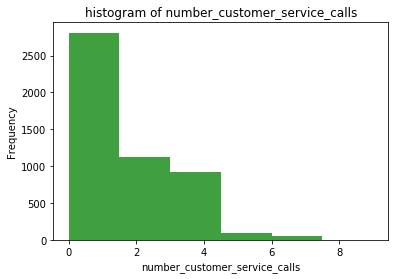

In [266]:
## visualize distribution of number of customer service calls

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## bin variables
## histogram of number_customer_service_calls
n, bins, patches = plt.hist(CHURN['number_customer_service_calls'], 6, facecolor='green', alpha=0.75)
#plt.ylim(0, 10)
plt.title('histogram of number_customer_service_calls')
plt.xlabel('number_customer_service_calls')
plt.ylabel("Frequency")
plt.show()

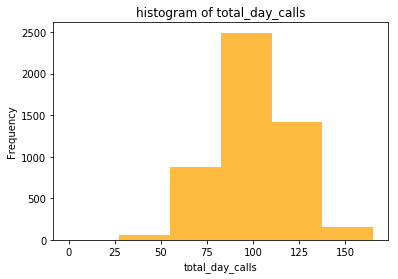

In [267]:
## visualize distribution of number of total calls

## bin variables
## histogram of number_customer_service_calls
n, bins, patches = plt.hist(CHURN['total_day_calls'], 6, facecolor='orange', alpha=0.75)
#plt.ylim(0, 10)
plt.title('histogram of total_day_calls')
plt.xlabel('total_day_calls')
plt.ylabel("Frequency")
plt.show()

In [268]:
## look at crosstab of number of customer service calls and churns

churn_cross=pd.crosstab(CHURN['number_customer_service_calls'], CHURN['churn'],colnames=['number_customer_service_calls'],rownames=['churn'])
print(churn_cross)

number_customer_service_calls    no  yes
churn                                   
0                               902  121
1                              1596  190
2                              1005  122
3                               592   73
4                               141  111
5                                38   58
6                                12   22
7                                 6    7
8                                 1    1
9                                 0    2


#### Insights from EDA:

The split of the target variable is fairly imbalanced (leaving only 14% "yes").  With a sample size of 5000, this still leaves 707 observed churns to predict from.

Nothing else jumped out from the distribution of numeric and catagorical variables. It was interesting, however, looking at the crosstab of number of customer service calls and churn rates.  Customers who called customer service 4 times or more were nearly 5x as likely to churn than those who called less than 4 (50.4% and 11.0%, respectively).  We can expect this feature to be important in our models.

#### Transform the data (so factors are dummied and missing values (if any) are fixed.)


In [269]:
#Dummies via Pandas
area_code_dummies = pd.DataFrame(pd.get_dummies(CHURN['area_code']))

CHURN = pd.concat([CHURN, area_code_dummies], axis=1)
CHURN.head(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_408,area_code_415,area_code_510
0,AK,1,area_code_408,no,no,0,175.2,74,29.78,151.7,...,109,10.37,5.3,3,1.43,1,no,1,0,0
1,AK,36,area_code_408,no,yes,30,146.3,128,24.87,162.5,...,109,5.82,14.5,6,3.92,0,no,1,0,0
2,AK,36,area_code_415,yes,yes,19,171.9,96,29.22,198.4,...,76,14.48,10.5,1,2.84,1,yes,0,1,0
3,AK,41,area_code_415,no,no,0,159.3,66,27.08,125.9,...,76,11.79,11.1,5,3.00,1,no,0,1,0
4,AK,42,area_code_415,no,no,0,171.0,129,29.07,183.9,...,90,5.86,4.6,6,1.24,0,no,0,1,0


In [270]:
## replace "yes/no" with 1 and 0
YN_cols = ['international_plan', 'voice_mail_plan', 'churn']

CHURN[YN_cols] = CHURN[YN_cols].replace(to_replace=['no', 'yes'], value=[0, 1])
CHURN.head(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_408,area_code_415,area_code_510
0,AK,1,area_code_408,0,0,0,175.2,74,29.78,151.7,...,109,10.37,5.3,3,1.43,1,0,1,0,0
1,AK,36,area_code_408,0,1,30,146.3,128,24.87,162.5,...,109,5.82,14.5,6,3.92,0,0,1,0,0
2,AK,36,area_code_415,1,1,19,171.9,96,29.22,198.4,...,76,14.48,10.5,1,2.84,1,1,0,1,0
3,AK,41,area_code_415,0,0,0,159.3,66,27.08,125.9,...,76,11.79,11.1,5,3.00,1,0,0,1,0
4,AK,42,area_code_415,0,0,0,171.0,129,29.07,183.9,...,90,5.86,4.6,6,1.24,0,0,0,1,0


In [271]:
### Replace nulls with median
CHURN.fillna((CHURN.median()), inplace=True)

In [272]:
## look at effects of replacing NAs with median on distribution of numeric features
CHURN.describe()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_408,area_code_415,area_code_510
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,100.25860,0.094600,0.264600,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,...,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,0.141400,0.25180,0.499000,0.249200
std,39.69456,0.292691,0.441164,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,...,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,0.348469,0.43409,0.500049,0.432593
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,73.00000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,...,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,0.000000,0.00000,0.000000,0.000000
50%,100.00000,0.000000,0.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,...,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000,0.00000,0.000000,0.000000
75%,127.00000,0.000000,1.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,...,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000,1.00000,1.000000,0.000000
max,243.00000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,...,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000,1.00000,1.000000,1.000000


#### Create a train and test sample of 70/30


In [273]:
##rearrange columns

## drop string columns
CHURN = CHURN.drop('area_code', 1)
CHURN = CHURN.drop('state', 1)

## create list of all columns
cols = list(CHURN)

# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('churn')))
cols

['churn',
 'account_length',
 'international_plan',
 'voice_mail_plan',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls',
 'area_code_408',
 'area_code_415',
 'area_code_510']

In [274]:
# reorder columns to get target variable in the first column
CHURN = CHURN.ix[:, cols]
CHURN.head()

/Users/ultrajosef/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,churn,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_408,area_code_415,area_code_510
0,0,1,0,0,0,175.2,74,29.78,151.7,79,...,230.5,109,10.37,5.3,3,1.43,1,1,0,0
1,0,36,0,1,30,146.3,128,24.87,162.5,80,...,129.3,109,5.82,14.5,6,3.92,0,1,0,0
2,1,36,1,1,19,171.9,96,29.22,198.4,111,...,321.7,76,14.48,10.5,1,2.84,1,0,1,0
3,0,41,0,0,0,159.3,66,27.08,125.9,75,...,261.9,76,11.79,11.1,5,3.00,1,0,1,0
4,0,42,0,0,0,171.0,129,29.07,183.9,96,...,130.2,90,5.86,4.6,6,1.24,0,0,1,0


In [275]:
# split dataset into testing and training
features_train, features_test, target_train, target_test = train_test_split(
    CHURN.iloc[:,1:].values, CHURN.iloc[:,0].values, test_size=0.30, random_state=0)

In [276]:
print(features_test.shape)
print(features_train.shape)
print(target_test.shape)
print(target_train.shape)

(1500, 20)
(3500, 20)
(1500,)
(3500,)


### Decision tree

In [277]:
#Decision Tree train model. Call up my model and name it clf
from sklearn import tree 
clf_dt = tree.DecisionTreeClassifier(max_depth = 3, criterion='entropy', random_state=35)
#Call up the model to see the parameters you can tune (and their default setting)
print(clf_dt)
#Fit clf to the training data
clf_dt = clf_dt.fit(features_train, target_train)
#Predict clf DT model again test data
target_predicted_dt = clf_dt.predict(features_test)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=35,
            splitter='best')


In [278]:
#Add packages
#These are my standard packages I load for almost every project
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#From Scikit Learn
from sklearn import preprocessing
from sklearn.model_selection  import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
#Notice I did not load my Datamining packages yet (ie decision tree). I will do that as I use them.

print("DT Accuracy Score", accuracy_score(target_test, target_predicted_dt))
print(classification_report(target_test, target_predicted_dt))
print(confusion_matrix(target_test, target_predicted_dt))



DT Accuracy Score 0.9073333333333333
             precision    recall  f1-score   support

          0       0.91      0.99      0.95      1285
          1       0.85      0.43      0.57       215

avg / total       0.90      0.91      0.89      1500

[[1268   17]
 [ 122   93]]


#### Decsion Tree:
This model has an accuracy of 90.7%, which is above the zero information rate of ~86%.  It only catches 43% of the "churns", which is the measure we are most concerned with while not picking up a lot of noise ("non-churns" predicted as "churns").  The "churns" predicted were right 84.5% of the time.

#### Cross validate your decision tree  cv=10

In [279]:
#verify DT with Cross Validation
scores = cross_val_score(clf_dt, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean()       

Cross Validation Score for each K [0.8974359  0.90598291 0.91142857 0.91142857 0.91428571 0.89714286
 0.88857143 0.90571429 0.91690544 0.90544413]


0.9054339802190807

#### Cross Validation explained: 
The Decsion Tree I cross validated, which takes an average of the 10 subsets (k-folds) used to create a more generalizable model and improve performance.  It does this by holding out a different sample each time and using the remaining data to train on.  This allows the use of all the data in the training of the model. The mean is .905, which is almost identical to the model (.907). The range of accuracies is also fairly small (from .889-.911), this gives us confidence that the model is not overfitting on the particular slice of data.  

#### visualize decision tree

In [280]:
from IPython.display import Image
dot_data = tree.export_graphviz(clf_dt, out_file=None, 
                         filled=True, rounded=True,  
                         special_characters=True)
#Add feature names

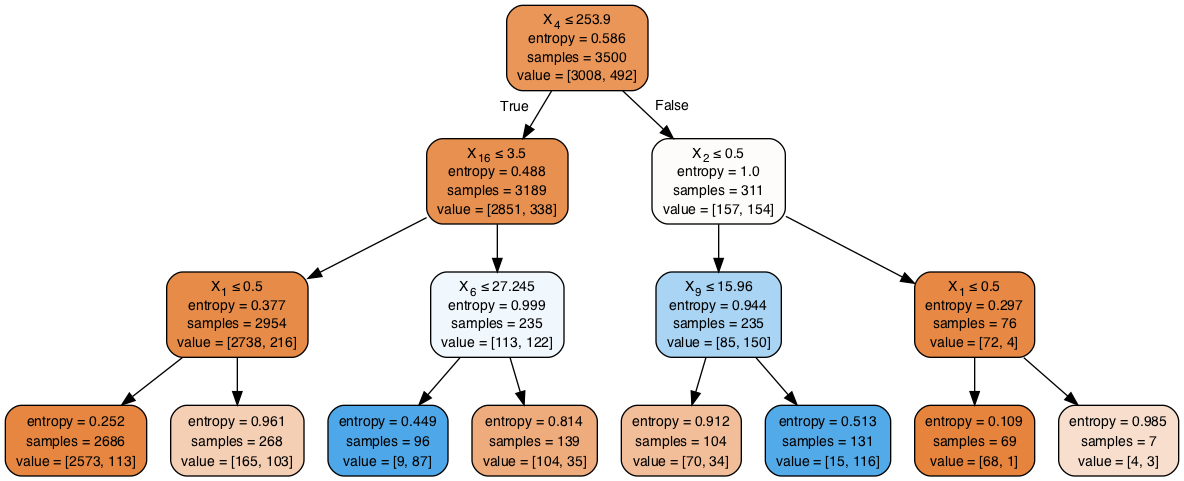

In [281]:
import pydotplus 
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png()) 

### KNN

In [282]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
knn_dt = neigh.fit(features_train, target_train) 

#Predict clf DT model again test data
target_predicted_dt = knn_dt.predict(features_test)

In [283]:
## output predictions

print("DT Accuracy Score", accuracy_score(target_test, target_predicted_dt))
print(classification_report(target_test, target_predicted_dt))
print(confusion_matrix(target_test, target_predicted_dt))

DT Accuracy Score 0.8746666666666667
             precision    recall  f1-score   support

          0       0.90      0.96      0.93      1285
          1       0.61      0.35      0.45       215

avg / total       0.86      0.87      0.86      1500

[[1236   49]
 [ 139   76]]


#### KNN:
This model has an accuracy of 87.5%, which is slightly above the zero information rate of ~86%.  It only catches 35% of the "churns", which is the measure we are most concerned with while not picking up a lot of noise ("non-churns" predicted as "churns").  The "churns" predicted were right 60.8% of the time.

#### Cross validate your decision tree  cv=10

In [284]:
#verify DT with Cross Validation
scores = cross_val_score(knn_dt, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean()       

Cross Validation Score for each K [0.86894587 0.86609687 0.86       0.88       0.86857143 0.87428571
 0.87714286 0.86857143 0.87106017 0.88538682]


0.8720061155018175

#### Cross Validation explained: 
The KNN model I cross validated, which takes an average of the 10 subsets (k-folds) used to create a more generalizable model and improve performance.  It does this by holding out a different sample each time and using the remaining data to train on.  This allows the use of all the data in the training of the model. The mean is .872, which is close to that of the model (.875). The range of accuracies is also within an expected range (from .86-.885), this gives us confidence that the model is not overfitting on the particular slice of data.

### Naïve Bayes

In [285]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb_dt = nb.fit(features_train, target_train) 

#Predict clf DT model again test data
target_predicted_dt = nb_dt.predict(features_test)


In [286]:
## output predictions

print("DT Accuracy Score", accuracy_score(target_test, target_predicted_dt))
print(classification_report(target_test, target_predicted_dt))
print(confusion_matrix(target_test, target_predicted_dt))

DT Accuracy Score 0.622
             precision    recall  f1-score   support

          0       0.90      0.62      0.74      1285
          1       0.21      0.60      0.31       215

avg / total       0.81      0.62      0.68      1500

[[803 482]
 [ 85 130]]


#### Naive Bayes:
This model has an accuracy of only 62.2%, which is well below that of the no information rate of ~86%.  However, it does capture 60% of the churns.

#### Cross validate your decision tree  cv=10

In [287]:
#verify DT with Cross Validation
scores = cross_val_score(nb_dt, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean()

Cross Validation Score for each K [0.63247863 0.62962963 0.61142857 0.65142857 0.60857143 0.62285714
 0.62       0.64       0.61604585 0.69627507]


0.6328714893299421

#### Cross Validation explained: 
The Naive Bayes model I cross validated, which takes an average of the 10 subsets (k-folds) used to create a more generalizable model and improve performance.  It does this by holding out a different sample each time and using the remaining data to train on.  This allows the use of all the data in the training of the model. The mean is .633, which is close to that of the model (.622). The range of accuracies is on the edge of being an acceptable range (from .602-.651), this means that there may be more variability in the model performance when exposed to new data.

### Random Forest

In [288]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, random_state=35)
rf = rf.fit(features_train, target_train)

#Predict clf DT model again test data
target_predicted_dt = rf.predict(features_test)

In [289]:
## output predictions
print("DT Accuracy Score", accuracy_score(target_test, target_predicted_dt))
print(classification_report(target_test, target_predicted_dt))
print(confusion_matrix(target_test, target_predicted_dt))

DT Accuracy Score 0.9513333333333334
             precision    recall  f1-score   support

          0       0.95      1.00      0.97      1285
          1       0.96      0.69      0.80       215

avg / total       0.95      0.95      0.95      1500

[[1279    6]
 [  67  148]]


#### Random Forest:
This model has an accuracy of 90.7%, which is above the zero information rate of ~86%.  It only catches 43% of the "churns", which is the measure we are most concerned with while not picking up a lot of noise ("non-churns" predicted as "churns").  The "churns" predicted were right 84.5% of the time.

### Conclusion:
The Decision Tree and KNN both perfomed above the a priori (90.7%, and 87.4%, accuracy respectively), the Random Forest was the best performing model (95.1%, accuracy).  It predicted 69% of the churns, while predicting 99% of the non-churns.  This is impressive lift over the a priori knowledge that only 14% of all observations were "churns". The consequence of innacurately predicting a churn is low.  So, for the purposes of our model, we are looking to efficiently maximize the number of predicted churns and the random forest performs best in both accuracy and recall of "churns".     

## END